Iteration	J				Theta0			Theta1
0		1.2821774704662507		0.12739869073178153	0.09171909714940558
1		1.0519690691333903		0.24028780207704634	0.1738785883670632
2		0.869831075258993		0.34027811963116994	0.24753280134097844
3		0.7257033648358703		0.42880193357828056	0.3136192865848346
4		0.6116315459863585		0.5071328156193543	0.37297175566349705
5		0.5213261924437328		0.5764032046780206	0.42633158590686243
6		0.4498143372578873		0.6376200441645423	0.47435805044055895
7		0.39316391502787207		0.6916786866791304	0.5176374147643096
8		0.3482658832438786		0.7393752581168108	0.5566910254608474
9		0.31266194948052		0.7814176518672572	0.5919825027040877
10		0.2844083583298335		0.8184353048907159	0.6239241358627253
11		0.261968190132497		0.8509878906342858	0.6528825704937262
12		0.24412620348347872		0.8795730487992043	0.6791838652374359
13		0.22992150270131806		0.9046332586729923	0.703117988427181
14		0.21859429918083736		0.9265619509167566	0.7249428164911932
15		0.20954381653019333		0.94570894218440

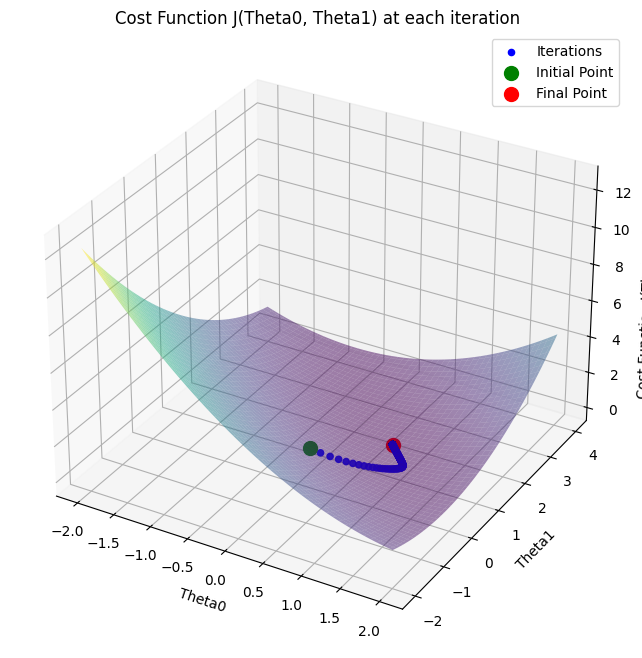

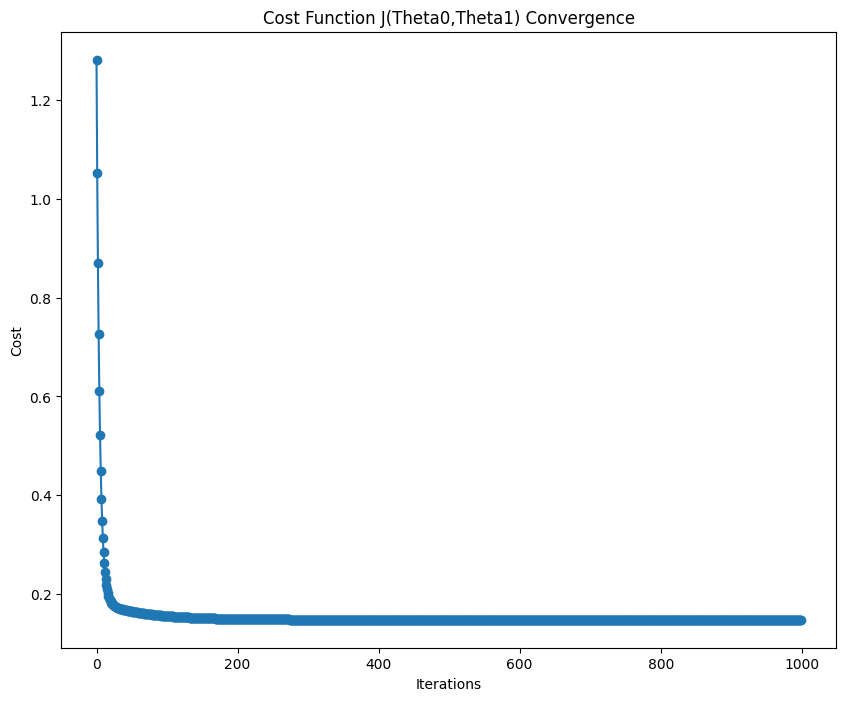

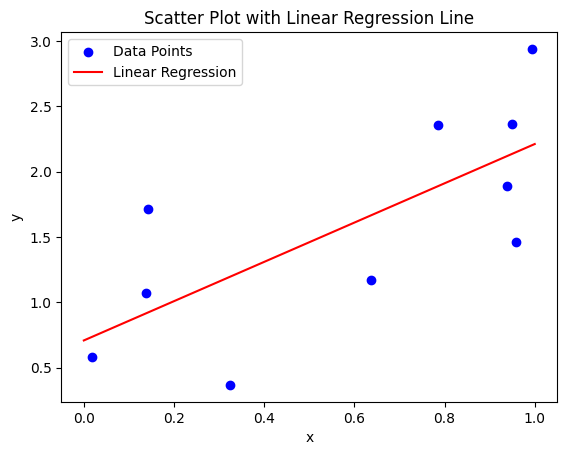

In [ ]:
import numpy as np     #Importing numpy library for numerical operations
import matplotlib.pyplot as plt   #Importing matplotlib library for plotting
from mpl_toolkits.mplot3d import Axes3D  #Importing Axes3D for numerical 3D plotting
import math     #Importing math library for mathematical operations
def h_theta(theta0,theta1,x):     #Function to calculate the hypothesis
    return theta0 + theta1 * x

def cost_func(theta0, theta1, x, y):  #Function to calculate the cost function
    m=len(x)   #Number of data points
    h=h_theta(theta0, theta1, x)
    return (1/(2*m)) * np.sum((h-y)**2)  #return cost function value

def gradient_descent(x,y,learning_rate=0.08, iterations=1000):  #Function for gradient descent function
    theta0 = theta1=0  #initialize parameters

    cost_history = []
    theta0_history=[]
    theta1_history=[]
    J_history=[]
    cost_previous=0;  #variable to store previous cost
    for i in range(iterations):


      y_predicted = h_theta(theta0,theta1,x)  #Calculate predicted va;ues
      cost = cost_func(theta0,theta1,x,y)
      md= -(1/len(x)) * np.sum(x *(y - y_predicted))  #Partial derivative wrt theta1
      bd= -(1/len(x)) * np.sum(y - y_predicted)    #Partial derivative wrt theta0
      theta1 -= learning_rate * md   #Update theta1
      theta0 -= learning_rate * bd   #Update theta0
      if math.isclose(cost,cost_previous,rel_tol=1e-20):  #break if the cost doesnt change significantly
        break

      #store history
      cost_history.append(cost)
      theta0_history.append(theta0)
      theta1_history.append(theta1)
      J_history.append(cost_func(theta0,theta1,x,y))
      cost_previous=cost;
    return theta0_history, theta1_history, J_history

#Generate random points give in point1
x=np.random.rand(10,1)
y=2*x+np.random.randn(10,1)

#Run gradient descent
theta0_history, theta1_history, J_history = gradient_descent(x,y)

#Print results
print("Iteration\tJ\t\t\t\tTheta0\t\t\tTheta1")
for i in range(len(J_history)):
  print(f"{i}\t\t{J_history[i]}\t\t{theta0_history[i]}\t{theta1_history[i]}")

#Plot cost function J(theta0,theta1) at each iteration
theta0_vals = np.linspace(-2, 2, 100)
theta1_vals = np.linspace(-2, 4, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_vals = np.zeros_like(theta0_grid)

for i in range(len(theta0_vals)):
  for j in range(len(theta1_vals)):
    cost_vals[i, j] = cost_func(theta0_vals[i], theta1_vals[j], x, y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(theta0_grid, theta1_grid, cost_vals, cmap = 'viridis', alpha = 0.5)
ax.scatter(theta0_history, theta1_history, J_history, color = 'blue', label = 'Iterations')
ax.scatter(theta0_history[0], theta1_history[0], J_history[0], color = 'green', s = 100, label = 'Initial Point')
ax.scatter(theta0_history[-1], theta1_history[-1], J_history[-1], color = 'red', s = 100, label = 'Final Point')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost Function J(Theta0, Theta1)')
ax.set_title('Cost Function J(Theta0, Theta1) at each iteration')
ax.legend()

plt.show()

#Plot the convergence of cost function
plt.figure(figsize=(10, 8))
plt.plot(J_history,marker='o',linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function J(Theta0,Theta1) Convergence')
plt.show()

#Plot scatter plot with linear regression line
plt.scatter(x,y, color='blue', label='Data Points')
x_values=np.linspace(0,1,100)
y_values=theta0_history[-1]+theta1_history[-1]*x_values
plt.plot(x_values,y_values,color='red',label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()
plt.show()